In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [155]:
path = "C:/Users/valc2/Documents/ITESO/semestre3/Machine Learning/proyecto/Traffic.csv"


In [156]:
data = pd.read_csv(path)
data.head(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
5,1:15:00 AM,10,Tuesday,44,0,5,4,53,low
6,1:30:00 AM,10,Tuesday,37,0,1,4,42,low
7,1:45:00 AM,10,Tuesday,42,4,4,5,55,low
8,2:00:00 AM,10,Tuesday,51,0,9,7,67,low
9,2:15:00 AM,10,Tuesday,34,0,4,7,45,low


In [174]:
data.sum()


Time                 141360
Date                  47616
Day of the week       11616
CarCount             204441
BikeCount             44394
BusCount              45472
TruckCount            45607
Total                339914
Traffic Situation      4357
dtype: int64

In [157]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

Encoders

In [158]:
le = LabelEncoder()
data['Time'] = le.fit_transform(data['Time'])
data['Traffic Situation'] = data['Traffic Situation'].replace({'low': 0,'normal': 1,'high': 2, 'heavy':3})
data['Day of the week'] = data['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})

Data Augmentation space


In [159]:
train_x, test_x = train_test_split(data,test_size=0.2,random_state=123)
train_x.shape, test_x.shape

((2380, 9), (596, 9))

<AxesSubplot:>

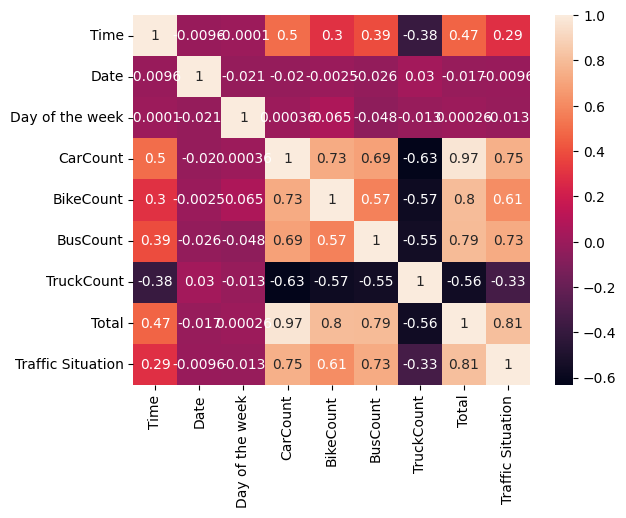

In [160]:
correlation_matrix = train_x.corr()
sns.heatmap(correlation_matrix, annot = True)


<AxesSubplot:xlabel='CarCount', ylabel='Count'>

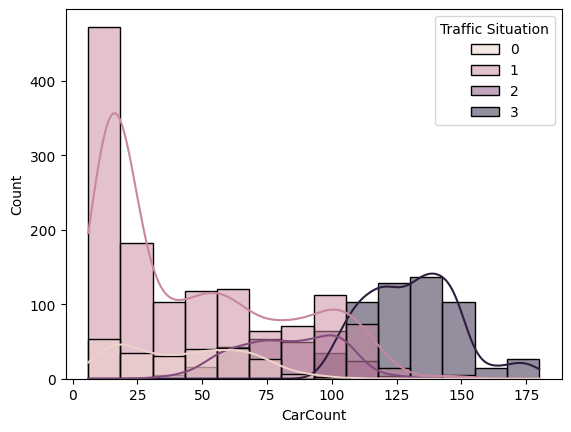

In [161]:
sns.histplot(train_x,x='CarCount',hue='Traffic Situation',kde=True, color='Set2')

In [162]:
train_x.corr()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
Time,1.000000,-0.009593,-0.000101,0.498604,0.296553,0.392496,-0.383034,0.469051,0.286938
Date,-0.009593,1.000000,-0.020533,-0.020254,-0.002471,-0.026405,0.029738,-0.017036,-0.009617
Day of the week,-0.000101,-0.020533,1.000000,0.000364,0.064539,-0.047686,-0.013470,0.000257,-0.013448
CarCount,0.498604,-0.020254,0.000364,1.000000,0.729175,0.693859,-0.631587,0.970899,0.746468
BikeCount,0.296553,-0.002471,0.064539,0.729175,1.000000,0.567419,-0.573350,0.802305,0.614320
BusCount,0.392496,-0.026405,-0.047686,0.693859,0.567419,1.000000,-0.551362,0.790545,0.729169
TruckCount,-0.383034,0.029738,-0.013470,-0.631587,-0.573350,-0.551362,1.000000,-0.559050,-0.333976
Total,0.469051,-0.017036,0.000257,0.970899,0.802305,0.790545,-0.559050,1.000000,0.813987
Traffic Situation,0.286938,-0.009617,-0.013448,0.746468,0.614320,0.729169,-0.333976,0.813987,1.000000


In [163]:
train_y = train_x["Traffic Situation"].to_numpy()
test_y = test_x["Traffic Situation"].to_numpy()
train_x = train_x.drop(columns=["Traffic Situation"],axis=1).to_numpy()
test_x = test_x.drop(columns=["Traffic Situation"],axis=1).to_numpy()


In [164]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

In [165]:
pipeline_traffic= Pipeline([
    ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("onehot",OneHotEncoder(handle_unknown='ignore')),
    ("std_scaler", StandardScaler(with_mean=False)),
    ("log_model", LogisticRegression(multi_class="multinomial",max_iter=200, random_state=42))
])
pipeline_traffic

Pipeline(steps=[('imputer', SimpleImputer()),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('std_scaler', StandardScaler(with_mean=False)),
                ('log_model',
                 LogisticRegression(max_iter=200, multi_class='multinomial',
                                    random_state=42))])

In [166]:
pipeline_knn = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5, weights="uniform")),
    ("std_scaler", StandardScaler()),
    ("onehot",OneHotEncoder(handle_unknown='ignore')),
    ("log_model", LogisticRegression(max_iter=200, random_state=42))
])
pipeline_knn

Pipeline(steps=[('imputer', KNNImputer()), ('std_scaler', StandardScaler()),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('log_model',
                 LogisticRegression(max_iter=200, random_state=42))])

In [167]:
pipeline_knn = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5, weights="uniform")),
    ("std_scaler", StandardScaler()),
    ("onehot",OneHotEncoder(handle_unknown='ignore')),
    ("log_model", LogisticRegression(max_iter=200, random_state=42))
])
pipeline_knn

Pipeline(steps=[('imputer', KNNImputer()), ('std_scaler', StandardScaler()),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('log_model',
                 LogisticRegression(max_iter=200, random_state=42))])

In [168]:
pipeline_traffic.fit(train_x, train_y)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('std_scaler', StandardScaler(with_mean=False)),
                ('log_model',
                 LogisticRegression(max_iter=200, multi_class='multinomial',
                                    random_state=42))])

In [169]:
train_acc = pipeline_traffic.score(test_x, test_y)
test_acc = pipeline_traffic.score(train_x, train_y)
print(f'Train acc: {train_acc}')
print(f'Test acc: {test_acc}')

Train acc: 0.9429530201342282
Test acc: 1.0


In [170]:
cv = 5
scoring = ["accuracy","f1","precision","recall"]
scores = cross_validate(pipeline_traffic, train_x, train_y, scoring=scoring, cv=cv)
print(f'CV:{cv}, Model acc mean: {scores["test_accuracy"].mean()}, std: {scores["test_accuracy"].std()}')
print(f'CV:{cv}, Model f1 mean: {scores["test_f1"].mean()}, std: {scores["test_f1"].std()}')
print(f'CV:{cv}, Model precision mean: {scores["test_precision"].mean()}, std: {scores["test_precision"].std()}')
print(f'CV:{cv}, Model recall mean: {scores["test_recall"].mean()}, std: {scores["test_recall"].std()}')

c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1136, in f1_score
  

CV:5, Model acc mean: nan, std: nan
CV:5, Model f1 mean: nan, std: nan
CV:5, Model precision mean: nan, std: nan
CV:5, Model recall mean: nan, std: nan


c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1136, in f1_score
  

In [171]:
from sklearn.model_selection import GridSearchCV
#'lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’
space = dict()
space["max_iter"] = [200,400,800]
space["solver"] = ['lbfgs', 'liblinear', 'newton-cg', 'sag']
model = LogisticRegression()
grid_search = GridSearchCV(model, space, cv=5, scoring="accuracy", return_train_score=True)

In [172]:
grid_search.fit(train_x, train_y)

c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\valc2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [200, 400, 800],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag']},
             return_train_score=True, scoring='accuracy')

In [173]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best model: {best_model}')
print(f'Best params: {best_params}')
print(f'Best score: {best_score}')

Best model: LogisticRegression(max_iter=200, solver='newton-cg')
Best params: {'max_iter': 200, 'solver': 'newton-cg'}
Best score: 0.9004201680672269
